## Sequence from spectrum

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Uniform random walk

Function `randomWalkUniform` implements the uniform random walk function.

The uniform random walk starts from the mathematical origin. The function then updates the coordinates by randomly picking a dimension and a direction.

#### Function help

In [2]:
from ffpack.lsg import harmonicSuperposition
help( harmonicSuperposition )

Help on function harmonicSuperposition in module ffpack.lsg.sequenceFromSpectrum:

harmonicSuperposition(fs, time, freq, psd, freqBandwidth=None)
    Generate load sequence by a random walk.
    
    Parameters
    ----------
    fs: scalar 
        Sampling frequence.
    time: scalar
        Total sampling time.
    freq: 1darray
        Frequence array for psd
    psd: 1darray
        Power spectrum density array. 
    freqBandwidth: scalar, optional
        Frequence bandwidth used to generate the time series from psd.
        Default to None, every frequence in freq will be used. 
    
    Returns
    -------
    ts: 1darray
        Array containing all the time data for the time series.
    amps: 1darray
        Amplitude array containing the amplitudes of the time series 
        corresponding to ts.
    
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1 or the dim is less than 1.
    
    Examples
    --------
    >>> from ffpack.lsg import harmon

#### Example with generated sequence

Generate sequence with two peak frequencies for psd

In [3]:
gfs = 500   # sampling frequency
fs1 = 20    # first signal component at 20 Hz
fs2 = 80    # second signal component at 80 Hz
T = 10      # 10s signal length
n0 = -10    # noise level (dB)

In [4]:
t = np.r_[ 0: T: ( 1 / gfs ) ]  # sample time
gdata = np.sin( 2 * fs1 * np.pi * t ) + np.sin( 2 * fs2 * np.pi * t )
gdata += np.random.randn( len( gdata ) ) * 10**( n0 / 20.0 )

In [5]:
from ffpack.lsm import periodogramSpectrum
gfreq, gpsd = periodogramSpectrum( gdata, gfs )

Use the psd to generate time series

In [6]:
fs = 500
time = 10
ts, amps = harmonicSuperposition( fs, time, gfreq, gpsd )

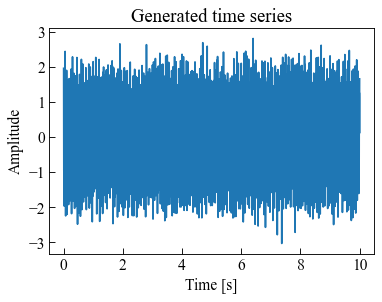

In [7]:
fig, ax = plt.subplots()

ax.plot( np.array( ts ),
         np.array( amps ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')

ax.set_xlabel( "Time [s]" )
ax.set_ylabel( "Amplitude" )
ax.set_title( "Generated time series" )

plt.tight_layout()
plt.show()

Generated sequence to spectrum

In [8]:
sfreq, spsd = periodogramSpectrum( amps, fs )

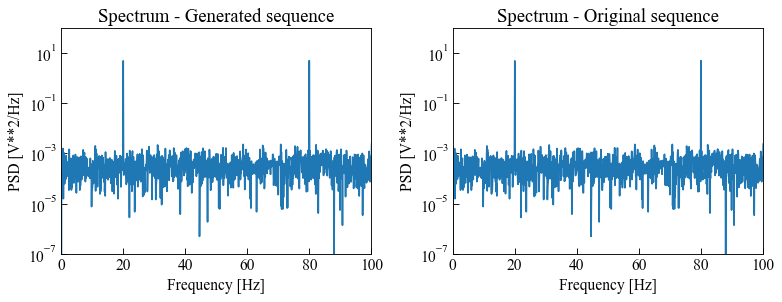

In [9]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )
plt.yscale("log")

ax1.semilogy( np.array( sfreq ),
             np.array( spsd ) )
ax1.tick_params(axis='x', direction="in", length=5)
ax1.tick_params(axis='y', direction="in", length=5)
ax1.tick_params(axis='x', direction="in", length=3, which='minor')
ax1.tick_params(axis='y', direction="in", length=3, which='minor')
ax1.set_ylim( [ 1e-7, 1e2 ] )
ax1.set_xlim( [ 0, 100 ] )
ax1.set_xlabel( "Frequency [Hz]" )
ax1.set_ylabel( "PSD [V**2/Hz]" )
ax1.set_title( "Spectrum - Generated sequence" )


ax2.semilogy( np.array( gfreq ),
             np.array( gpsd ) )
ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.tick_params(axis='x', direction="in", length=3, which='minor')
ax2.tick_params(axis='y', direction="in", length=3, which='minor')
ax2.set_ylim( [ 1e-7, 1e2 ] )
ax2.set_xlim( [ 0, 100 ] )
ax2.set_xlabel( "Frequency [Hz]" )
ax2.set_ylabel( "PSD [V**2/Hz]" )
ax2.set_title( "Spectrum - Original sequence" )

plt.tight_layout()
plt.show()

In [10]:
ind = np.argpartition( spsd, -2 )[ -2: ]
peak1 = min( sfreq[ ind ] )
peak2 = max( sfreq[ ind ] )
print( "Peak frequences - Generated sequence" )
print( [ peak1, peak2 ] )

ind = np.argpartition( gpsd, -2 )[ -2: ]
peak1 = min( gfreq[ ind ] )
peak2 = max( gfreq[ ind ] )
print( "\nPeak frequences - Original sequence" )
print( [ peak1, peak2 ] )

Peak frequences - Generated sequence
[20.0, 80.0]

Peak frequences - Original sequence
[20.0, 80.0]


#### Example with Davenport spectrum

In [11]:
from ffpack.lsm import davenportSpectrumWithRoughnessLength

dsrnfRange = np.linspace( 0.1, 10, num=100 )

In [12]:
uz = 10
dsrnfResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=False )
                 for n in dsrnfRange ]

In [13]:
dfs = 500
time = 10
dts, damps = harmonicSuperposition( dfs, time, dsrnfRange, dsrnfResults )

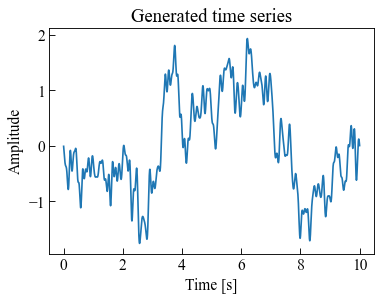

In [14]:
fig, ax = plt.subplots()

ax.plot( np.array( dts ),
         np.array( damps ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')

ax.set_xlabel( "Time [s]" )
ax.set_ylabel( "Amplitude" )
ax.set_title( "Generated time series" )

plt.tight_layout()
plt.show()

In [15]:
dsfreq, dspsd = periodogramSpectrum( damps, dfs )

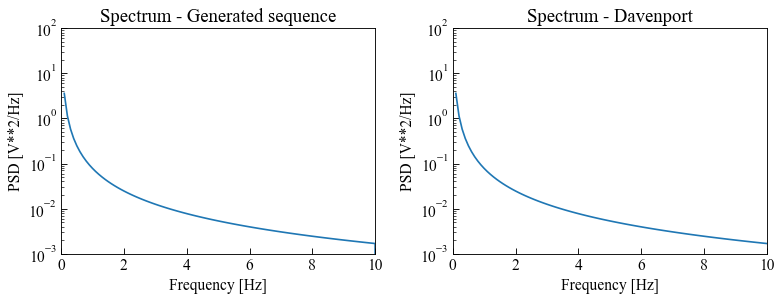

In [16]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.semilogy( np.array( dsfreq[ 1: -10 ] ),
              np.array( dspsd[ 1: -10 ] ) )
ax1.tick_params(axis='x', direction="in", length=5)
ax1.tick_params(axis='y', direction="in", length=5)
ax1.tick_params(axis='x', direction="in", length=3, which='minor')
ax1.tick_params(axis='y', direction="in", length=3, which='minor')
ax1.set_ylim( [ 1e-3, 1e2 ] )
ax1.set_xlim( [ 0, 10 ] )
ax1.set_xlabel( "Frequency [Hz]" )
ax1.set_ylabel( "PSD [V**2/Hz]" )
ax1.set_title( "Spectrum - Generated sequence" )

ax2.semilogy( np.array( dsrnfRange ),
              np.array( dsrnfResults ) )
ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.tick_params(axis='x', direction="in", length=3, which='minor')
ax2.tick_params(axis='y', direction="in", length=3, which='minor')
ax2.set_ylim( [ 1e-3, 1e2 ] )
ax2.set_xlim( [ 0, 10 ] )
ax2.set_xlabel( "Frequency [Hz]" )
ax2.set_ylabel( "PSD [V**2/Hz]" )
ax2.set_title( "Spectrum - Davenport" )

plt.tight_layout()
plt.show()